### Files

For all files the values were aggregated over 6 models (NN, LGR, RF, DT, SVM, NB) with 40 iterations each. 

- CHANGE_(attr).csv -> change percentage from the base model
- MEAN_(attr).csv -> mean values over all runs
- STD_(attr).csv -> std of values from all runs

### RQ1: WHICH LOSS (initial thoughts)

Rule out based on prediction performance on adult (compas has good performance for all):
- FL the lowest performance on all 4 metrics
- FK, L, VAE, also significantly lowest metrics for adult sex and very high variance
- F 2nd lowest performance and high var on adult race

- FP, LP, P, KL, KP, K all have similar results 

note that all well performing losses seem to use either K or P


BIAS mit performance?

KL, KP, K seem to have consistently good DI, SF, ASPD, for botgh datasets and attributes

PLAN: 
keep going with the KL, KP, K
KL - is advrserial so ideally would rule it out due to time constraints. if K does not reliably perform this will be suggested as the alternative without using Y labels!!!
KP - seems best BUT uses Y. (justify KP by the lower var on adult race aod???? ... sus)
K - seems bit more variance and less debias but will wait for enough evidence

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


# SAVE TO RESULTS FILE

In [2]:
FOLDER = "RQ123_MEAN_METRICS"

if not os.path.exists(FOLDER):
    os.makedirs(FOLDER)

In [3]:
# for each file and each dataset get
#   mean value for all metrics
#   mean change for all metrics
#   mean std for all metrics
# averaged over all 6 models

In [4]:

for attr in [["sex"],["race"],["race", "sex"]]:     
    files = [os.path.join("results","RESULTS_"+'_'.join(attr)+".csv")]        
    
    reader = ResultsReader(files)
    
    """
    df = reader.get_relative_metrics(use_percent=True)
    df[reader.ML] = ''
    mean_df = df.groupby(reader.filterable).mean().reset_index()
    mean_df.to_csv( os.path.join(FOLDER,"NN_CHANGE_"+'_'.join(attr)+'.csv'), index=False)"""
    
    df = reader.get_mean_metrics()
    df = df[(df[reader.ML].str.contains('nn'))]
    mean_df = df.groupby(reader.filterable).mean().reset_index()
    mean_df.to_csv(os.path.join(FOLDER,"NN_MEAN_"+'_'.join(attr)+'.csv'), index=False)
    
    df = reader.get_filtered_df()
    df = df[(df[reader.ML].str.contains('nn'))]
    mean_df = df.groupby(reader.filterable).std().reset_index()
    mean_df.to_csv(os.path.join(FOLDER,"NN_STD_"+'_'.join(attr)+'.csv'), index=False)



File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.


In [5]:

for attr in [["sex"],["race"],["race", "sex"]]:     
    files = [os.path.join("results","RESULTS_with_no_vae_"+'_'.join(attr)+".csv")]        
    
    reader = ResultsReader(files)

    df = reader.get_mean_metrics()
    df = df[(df[reader.ML].str.contains('nn'))]
    mean_df = df.groupby(reader.filterable).mean().reset_index()
    mean_df.to_csv(os.path.join(FOLDER,"NN_MEAN_no_vae_"+'_'.join(attr)+'.csv'), index=False)
    
    df = reader.get_filtered_df()
    df = df[(df[reader.ML].str.contains('nn'))]
    mean_df = df.groupby(reader.filterable).std().reset_index()
    mean_df.to_csv(os.path.join(FOLDER,"NN_STD_no_vae_"+'_'.join(attr)+'.csv'), index=False)



File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_with_no_vae_race_sex.csv' successfully loaded as DataFrame.


In [6]:
FOLDER = "RQ1_LOSS_SELECTION"

if not os.path.exists(FOLDER):
    os.makedirs(FOLDER)

# VIS

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *


### MEAN VAL all losses vs baseline for NN (7) F1 vs SF

In [8]:
size = 3.3

In [9]:
def f(df, reader = None): # Keep only baseline and my losses for NN
    df = df[(df["ML method"].str.contains('nn'))]
    df = df[(df["bias mitigation"].str.contains('FYP VAE')) | df["bias mitigation"].str.contains('No') ]
    return df

In [10]:

files, datasets, titles = get_all_result_files(True)

File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: [DF] Differential Fairness f1score  | all found  ['[DF] Differential Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_race_sex.csv' succe

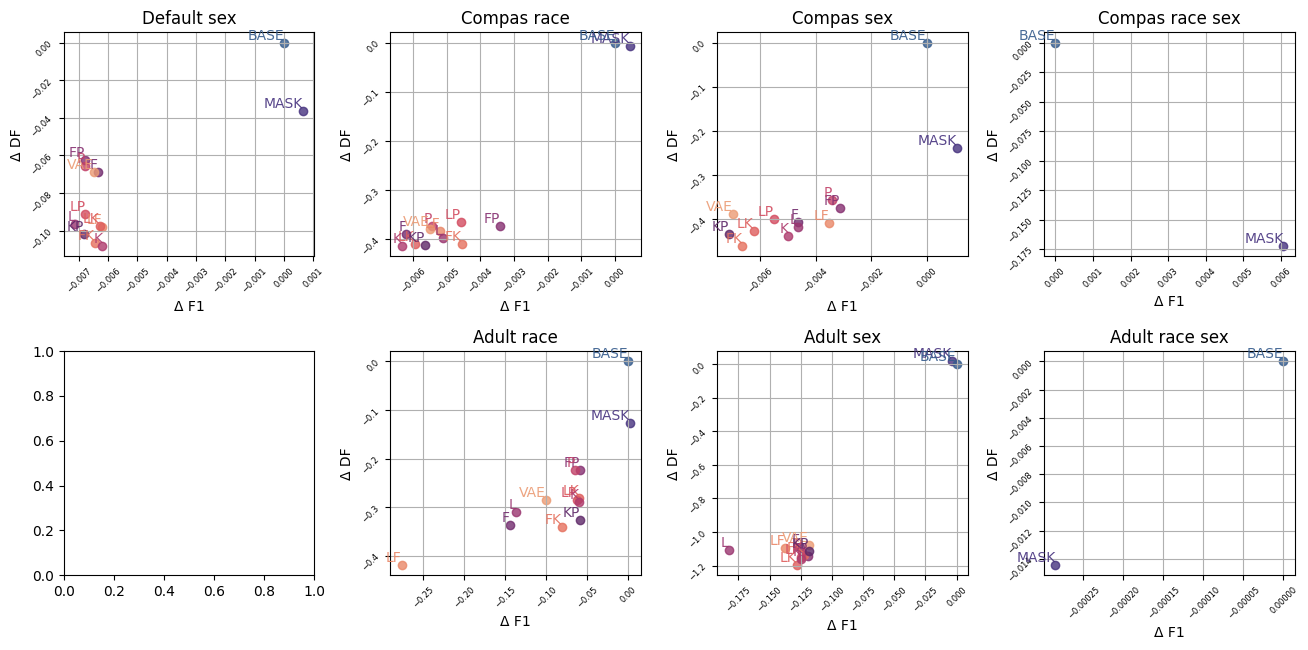

In [11]:
# ALL MODELS
F, axes = plt.subplots(2, 4, figsize=(size*(4), size*2))

a_count = 0
for i in range(7):
    y = 1 if ("Adult" in titles[i]) else 0
    a_count += y
    x = a_count if ("Adult" in titles[i]) else i - a_count 
    plot_one_run(f, files[i], datasets[i], axes[y][x], y_metric = 'DF')
    axes[y][x].set_title(titles[i])
    axes[y][x].set_ylabel("Δ DF") # comment out to make sure 
    axes[y][x].set_xlabel("Δ F1")
    
plt.rc('axes', axisbelow=True)
plt.tight_layout()
plt.savefig('imgs/RQ1_all_losses_F1_DF.png')
plt.show()

File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness 

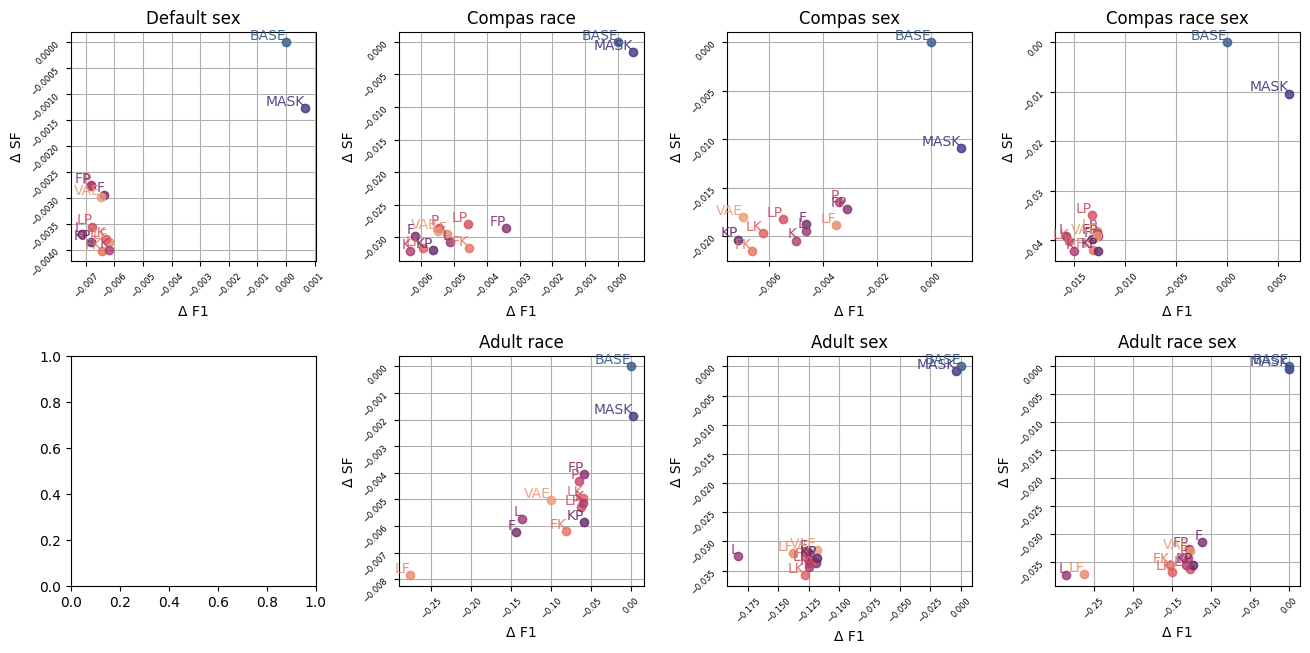

In [12]:
# ALL MODELS
F, axes = plt.subplots(2, 4, figsize=(size*(4), size*2))

a_count = 0
for i in range(7):
    y = 1 if ("Adult" in titles[i]) else 0
    a_count += y
    x = a_count if ("Adult" in titles[i]) else i - a_count 
    plot_one_run(f, files[i], datasets[i], axes[y][x])
    axes[y][x].set_title(titles[i])
    axes[y][x].set_ylabel("Δ SF") # comment out to make sure 
    axes[y][x].set_xlabel("Δ F1")
    
plt.rc('axes', axisbelow=True)
plt.tight_layout()
plt.savefig('imgs/RQ1_all_losses_F1_SF.png')
plt.show()

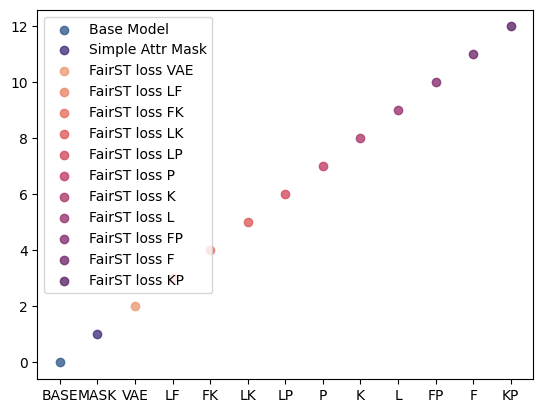

In [13]:
# LEGEND!
grapher = ResultsGrapher(None)
labels  = ['BASE', "MASK", "VAE","LF","FK","LK","LP","P","K","L","FP", "F","KP"]
for i, l in enumerate(labels):
    plt.scatter(
            l,
            i,
            label=grapher._get_legend_text(l, l),
            color=grapher.get_color(l),
            alpha=0.8,
        )
plt.legend()
plt.show()
